In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path="../Data/"
eeg_folder=os.path.join(data_path,"25-users")
labels_folder=os.path.join(data_path,'labels')
print("EEG Data Path:", os.path.exists(eeg_folder))
print("Labels Path:", os.path.exists(labels_folder))

EEG Data Path: True
Labels Path: True


In [23]:
import pandas as pd
df= pd.read_csv(r"C:\Users\shasw\OneDrive\Desktop\EEG-Neuromarkiting-Project\combined_text_files.csv")
df

,name,product,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,label
0,Abhishek,1,3689.743590,3701.025641,3835.384615,2734.871795,4188.205128,3781.025641,3699.487179,3702.564103,3818.461538,4218.461538,3737.435897,3764.102564,3763.589744,3926.666667,Like
1,Abhishek,1,3699.487179,3704.615385,3844.615385,2701.538462,4184.615385,3785.641026,3708.717949,3707.692308,3829.230769,4216.923077,3751.282051,3770.769231,3776.923077,3934.871795,Like
2,Abhishek,1,3708.717949,3718.974359,3861.025641,2679.487179,4185.641026,3785.641026,3717.435897,3716.410256,3845.641026,4219.487179,3747.692308,3767.692308,3776.410256,3942.564103,Like
3,Abhishek,1,3719.487179,3755.384615,3871.282051,2688.717949,4184.615385,3793.846154,3730.769231,3731.794872,3867.179487,4217.948718,3765.128205,3773.846154,3794.358974,3945.128205,Like
4,Abhishek,1,3727.179487,3760.512821,3870.256410,2700.512821,4183.076923,3810.769231,3747.179487,3739.487179,3882.051282,4224.615385,3793.333333,3788.717949,3821.538462,3947.179487,Like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535035,Viraj,9,4288.205128,4222.564103,4268.717949,4239.487179,4226.666667,4239.487179,4127.692308,3931.794872,4219.487179,4231.282051,4088.205128,4341.025641,4035.897436,4246.153846,Disike
535036,Viraj,9,4302.564103,4241.025641,4284.615385,4257.948718,4226.153846,4252.307692,4141.025641,3948.205128,4262.051282,4231.794872,4118.461538,4349.743590,4063.076923,4257.435897,Disike
535037,Viraj,9,4300.000000,4245.641026,4275.897436,4259.487179,4228.205128,4252.307692,4144.102564,3946.153846,4251.794872,4231.282051,4118.461538,4342.051282,4060.000000,4255.897436,Disike
535038,Viraj,9,4282.564103,4222.051282,4258.461538,4235.384615,4233.333333,4228.717949,4133.846154,3935.384615,4215.897436,4231.794872,4080.000000,4335.384615,4021.025641,4244.102564,Disike


EEG Data Shape: (512, 14)


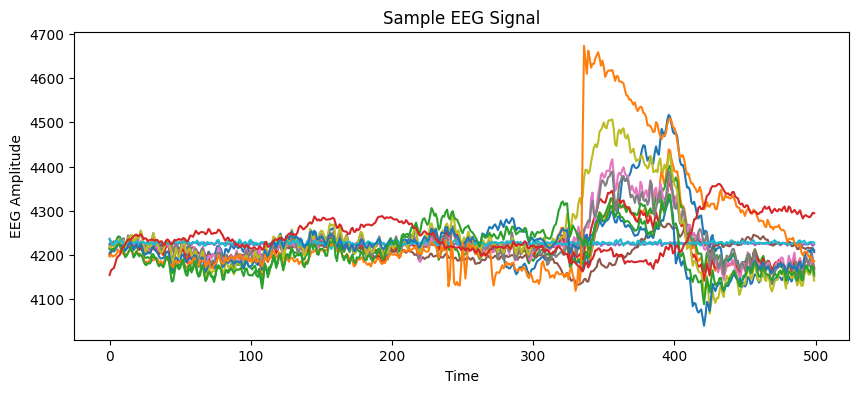

In [3]:
def load_eeg_data(filename):
    filepath = os.path.join(eeg_folder, filename)

    with open(filepath, "r") as file:
        raw_data = file.read().strip()  # Read full file content

    eeg_data = np.array([list(map(float, line.split())) for line in raw_data.split("\n")])
    return eeg_data

# Example: Load EEG data for a specific user and product
eeg_sample = load_eeg_data("pawan_sahu_1.txt")
print("EEG Data Shape:", eeg_sample.shape)

# Plot sample EEG signal
plt.figure(figsize=(10, 4))
plt.plot(eeg_sample[:500])  # Plot first 500 time points
plt.title("Sample EEG Signal")
plt.xlabel("Time")
plt.ylabel("EEG Amplitude")
plt.show()


In [4]:
eeg_sample 

array([[4223.076923, 4199.487179, 4218.461538, ..., 4196.410256,
        4212.820513, 4154.871795],
       [4224.615385, 4207.179487, 4218.974359, ..., 4201.538462,
        4211.794872, 4165.128205],
       [4227.692308, 4208.205128, 4221.025641, ..., 4196.410256,
        4213.333333, 4168.205128],
       ...,
       [4181.025641, 4198.974359, 4200.      , ..., 4200.      ,
        4182.051282, 4282.564103],
       [4178.974359, 4191.794872, 4199.487179, ..., 4196.410256,
        4173.333333, 4280.      ],
       [4164.102564, 4183.076923, 4187.692308, ..., 4192.307692,
        4173.333333, 4277.435897]], shape=(512, 14))

In [5]:
def load_label(filename):
    """Load opinion label from a file (like/dislike)."""
    filepath = os.path.join(labels_folder, filename)
    
    if not os.path.exists(filepath):
        print(f"Label file {filename} not found.")
        return None
    
    with open(filepath, "r") as file:
        label = file.read().strip()  # Read and remove extra spaces
    
    return label

# Example: Load label for the same person and product
label_sample = load_label("pawan_sahu_1.lab")
print("Opinion Label:", label_sample)

Opinion Label: Like


In [6]:
import re
def natural_sort(files):
    """Sort filenames in human order (e.g., 1, 2, 10 instead of 1, 10, 2)"""
    def extract_number(text):
        match = re.search(r'(\d+)', text)  # Extract number from filename
        return int(match.group()) if match else float('inf')  # Convert to int if found
    
    return sorted(files, key=lambda x: (x.split("_")[0], extract_number(x)))

# Get EEG and label filenames
eeg_files = [f.replace(".txt", "") for f in os.listdir(eeg_folder) if f.endswith(".txt")]
label_files = [f.replace(".lab", "") for f in os.listdir(labels_folder) if f.endswith(".lab")]

# Apply natural sorting
eeg_files_sorted = natural_sort(eeg_files)
label_files_sorted = natural_sort(label_files)

# Print first 10 to check the correct order
print("\nFirst 10 Sorted EEG Files:", eeg_files_sorted[:42])
print("\nFirst 10 Sorted Label Files:", label_files_sorted[:42])


First 10 Sorted EEG Files: ['Abhishek_1', 'Abhishek_2', 'Abhishek_3', 'Abhishek_4', 'Abhishek_5', 'Abhishek_6', 'Abhishek_7', 'Abhishek_8', 'Abhishek_9', 'Abhishek_10', 'Abhishek_11', 'Abhishek_12', 'Abhishek_13', 'Abhishek_14', 'Abhishek_15', 'Abhishek_16', 'Abhishek_17', 'Abhishek_18', 'Abhishek_19', 'Abhishek_20', 'Abhishek_21', 'Abhishek_22', 'Abhishek_23', 'Abhishek_24', 'Abhishek_25', 'Abhishek_26', 'Abhishek_27', 'Abhishek_28', 'Abhishek_29', 'Abhishek_30', 'Abhishek_31', 'Abhishek_32', 'Abhishek_33', 'Abhishek_34', 'Abhishek_35', 'Abhishek_36', 'Abhishek_37', 'Abhishek_38', 'Abhishek_39', 'Abhishek_40', 'Abhishek_41', 'Abhishek_42']

First 10 Sorted Label Files: ['Abhishek_1', 'Abhishek_2', 'Abhishek_3', 'Abhishek_4', 'Abhishek_5', 'Abhishek_6', 'Abhishek_7', 'Abhishek_8', 'Abhishek_9', 'Abhishek_10', 'Abhishek_11', 'Abhishek_12', 'Abhishek_13', 'Abhishek_14', 'Abhishek_15', 'Abhishek_16', 'Abhishek_17', 'Abhishek_18', 'Abhishek_19', 'Abhishek_20', 'Abhishek_21', 'Abhishek_22'

In [7]:

# Remove extensions and get base filenames
eeg_base = {file.replace(".txt", "") for file in eeg_files_sorted}
label_base = {file.replace(".lab", "") for file in label_files_sorted}

# Find common files (matching person_product identifiers)
matching_files = eeg_base.intersection(label_base)

print(f"✅ Matched Files: {len(matching_files)} out of {len(eeg_files_sorted)} EEG files")
print(f"🚨 Missing Labels: {len(eeg_files_sorted) - len(matching_files)}")

✅ Matched Files: 1045 out of 1045 EEG files
🚨 Missing Labels: 0


In [14]:
dataset = []
for person_product in matching_files:
    eeg_data = load_eeg_data(person_product + ".txt")  # Add extension back
    label = load_label(person_product + ".lab")  # Add extension back
    
    dataset.append((person_product, eeg_data, label))

# Convert to DataFrame
df = pd.DataFrame(dataset, columns=["Person_Product", "EEG_Signal", "Label"])


In [15]:
df.head(20)

,Person_Product,EEG_Signal,Label
0,Soumendu_38,"[[4287.179487, 4348.717949, 4244.615385, 4248....",Like
1,Mohit_39,"[[4257.948718, 4231.282051, 4248.717949, 4243....",Disike
2,Suraj_sir_13,"[[4220.512821, 4228.717949, 4225.128205, 4268....",Like
3,Soumendu_32,"[[4235.897436, 4275.897436, 4235.897436, 4238....",Like
4,Suraj_sir_37,"[[4237.435897, 4235.897436, 4252.820513, 4252....",Disike
5,Kishore_babu_40,"[[4228.717949, 4233.846154, 4237.435897, 4235....",Like
6,rajkumar_16,"[[4218.461538, 4216.923077, 4204.615385, 4215....",Like
7,rajkumar_25,"[[4289.74359, 4295.897436, 4274.358974, 4269.7...",Disike
8,Ravi_ph_40,"[[4165.128205, 4181.538462, 4194.358974, 4162....",Disike
9,Viraj_1_15,"[[4225.128205, 4233.846154, 4218.974359, 4224....",Disike


In [16]:
label_counts = df["Label"].value_counts()

# Print counts for verification
print(label_counts)

Label
Disike    584
Like      461
Name: count, dtype: int64
